#### ФБ-22 Руденко Поліна лабораторна робота 5

In [3]:
import matplotlib.pyplot as plt
import numpy as np

print("Setup complete")

Setup complete


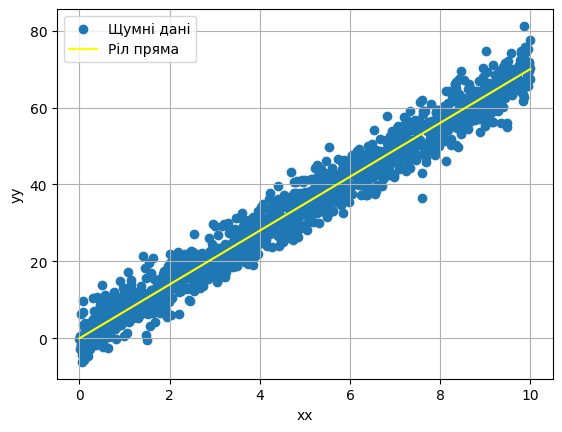

In [7]:
# Задані коефіцієнти прямої
h = 7
p = 0
N = 1_234
# Генеруємо значення xx
xx = np.linspace(0, 10, N)

# Генеруємо значення yy з шумом навколо прямої yy = kk * xx + bb
noise = np.random.normal(0, 4, N)
yy = h * xx + p + noise

# Відображення даних
plt.scatter(xx, yy, label='Щумні дані')
plt.plot(xx, h * xx + p, color='yellow', label='Ріл пряма')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.show()

1. Формула нахилу ( a ): a = n (∑ xy )−(∑ x )(∑ y ) / n (∑ x 2 )−(∑ x )2
2. Перетин ( b ) Формула: b =(∑ y )− a (∑ x ) / n
Де:
n – кількість точок даних,
∑ xy – сума добутку кожної пари значень x і y ,
∑ x – сума всіх значень x ,
∑ y – сума всіх значень y ,
∑ x 2 — сума квадратів значень x .

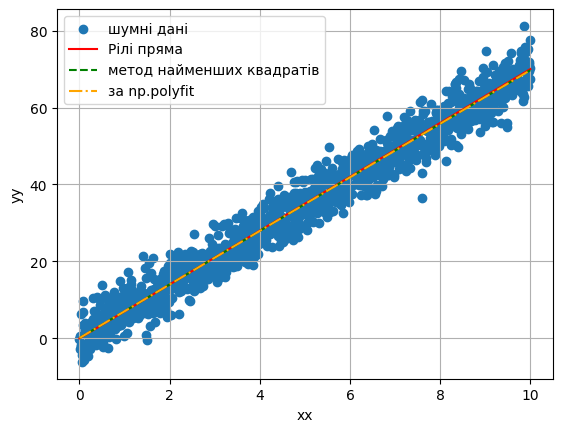

Рілі пряма :
h = 7
p = 0

метод найменших квадратів:
h_hat = 6.9629389285223855
p_hat = 0.07097264219571574

за np.polyfit:
h_np_polyfit = 6.962938928522396
p_np_polyfit = 0.07097264219566712


In [8]:
# Реалізація методу найменших квадратів
def least_squares_method(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)
    
    # Обчислюємо коефіцієнти прямої
    hhat1 = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    phat1 = (sum_y - hhat1 * sum_x) / n
    
    return hhat1, phat1

# Знайдення оцінок коефіцієнтів за методом найменших квадратів
hhat, phat = least_squares_method(xx, yy)

# Знайдення оцінок коефіцієнтів за допомогою np.polyfit
coefficients = np.polyfit(xx, yy, 1)
h_np_polyfit = coefficients[0]
p_np_polyfit = coefficients[1]

# Відображення знайдених оцінок лінії регресії
plt.scatter(xx, yy, label='шумні дані')
plt.plot(xx, h * xx + p, color='red', label='Рілі пряма')
plt.plot(xx, hhat * xx + phat, color='green', linestyle='--', label='метод найменших квадратів')
plt.plot(xx, h_np_polyfit * xx + p_np_polyfit, color='orange', linestyle='-.', label='за np.polyfit')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.show()

print("Рілі пряма :")
print("h =", h)
print("p =", p)
print()
print("метод найменших квадратів:")
print("h_hat =", hhat)
print("p_hat =", phat)
print()
print("за np.polyfit:")
print("h_np_polyfit =", h_np_polyfit)
print("p_np_polyfit =", p_np_polyfit)

Градієнтний спуск зупинено на ітерації 292 з похибкою 0.02683008266631045
3.4555021552395324 1.7310069168454167


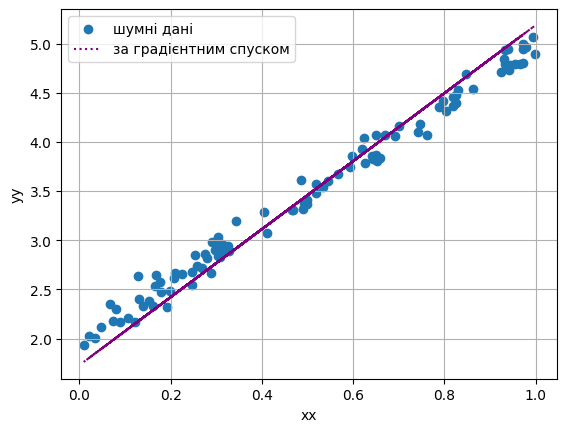

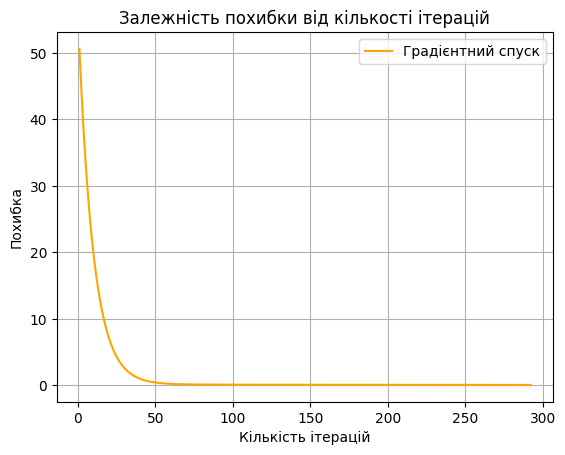

In [32]:
# Функція градієнтного спуску
def gradient_descent(x, y, learning_rate1, n_iter1, tolerance=1e-4):
    # Початкові оцінки коефіцієнтів
    hhat1 = 7
    phat1 = 7
    n = len(x)
    
    # Перевірка на валідність параметрів
    if n_iter1 <= 0 or learning_rate1 <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")
    
    error_list = []
    
    # Градієнтний спуск
    for iteration in range(n_iter1):
        # Обчислення градієнтів
        y_pred = hhat1 * x + phat1
        gradient_h = (-2/n) * np.sum(x * (y - y_pred))
        gradient_p = (-2/n) * np.sum(y - y_pred)

        # Оновлення параметрів
        hhat1 -= learning_rate1 * gradient_h
        phat1 -= learning_rate1 * gradient_p
        
        # Обчислення втрат
        error = np.mean((y_pred - y) ** 2)
        error_list.append(error)
        
        # Перевірка умови зупинки
        if iteration > 1 and abs(error_list[-1] - error_list[-2]) <= tolerance:
            print(f"Градієнтний спуск зупинено на ітерації {iteration + 1} з похибкою {error}")
            break

        # Зупинка, якщо похибка стає близькою до нуля
        if error <= tolerance:
            print(f"Градієнтний спуск досяг нуля на ітерації {iteration + 1} з похибкою {error}")
            break
    
    return hhat1, phat1, error_list

# Оптимальні параметри градієнтного спуску
learning_rate = 0.02
n_iter = 19000

# Приклад даних для тестування
xx = np.random.rand(100)
yy = 3 * xx + 2 + np.random.randn(100) * 0.1

# Виклик функції градієнтного спуску
h_gradient, p_gradient, error_list = gradient_descent(xx, yy, learning_rate, n_iter)
print(h_gradient, p_gradient)

# Функція втрат для градієнтного спуску
def loss_function(x, y, h1, p1):
    """Обчислює середньоквадратичну помилку між прогнозованими значеннями y_pred та істинними значеннями y"""
    y_pred = h1 * x + p1
    return np.mean((y_pred - y) ** 2)

# Відображення знайдених оцінок лінії регресії разом з іншими
plt.scatter(xx, yy, label='шумні дані')
plt.plot(xx, h_gradient * xx + p_gradient, color='purple', linestyle=':', label='за градієнтним спуском')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.show()

# Графік залежності похибки від кількості ітерацій
iterations = range(1, len(error_list) + 1)
plt.plot(iterations, error_list, color='orange', label='Градієнтний спуск')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій')
plt.legend()
plt.grid(True)
plt.show()
